# Hourly Energy Consumption

## Step 1 :

### Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## Step 2

### Get to know about your dataset

In [2]:
df = pd.read_csv("/Users/macbookpro/Desktop/tableau/Jupyter Data /Hourly Energy Consumption/AEP_hourly.csv",parse_dates=["Datetime"]) 
df.head(2)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0


In [3]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


In [5]:
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [6]:
df["New_tate"]=pd.to_datetime(df["Datetime"]).dt.date
df["New_time"]=pd.to_datetime(df["Datetime"]).dt.time
df["Year"]=pd.to_datetime(df["Datetime"]).dt.year
df["Month"]=pd.to_datetime(df["Datetime"]).dt.month 
df.head(4)

,Datetime,AEP_MW,New_Date,New_time,Year,Month
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004,12
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004,12
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,2004,12
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,2004,12


In [7]:
df["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [8]:
df["Year"].nunique()

15

## Maximum Energy Consumes in Year 2018

In [9]:
df[df["Year"]==2018]["AEP_MW"]

107401    18687.0
116138    13286.0
116139    12587.0
116140    12296.0
116141    12059.0
           ...   
121268    21089.0
121269    20999.0
121270    20820.0
121271    20415.0
121272    19993.0
Name: AEP_MW, Length: 5136, dtype: float64

In [10]:
df[df["Year"]==2018]["AEP_MW"].max()

22759.0

# Minimum Energy Consumes in Year 2018

In [11]:
df[df["Year"]==2018]["AEP_MW"].min()

9815.0

# Average Energy Consumes in Year 2018

In [12]:
df[df["Year"]==2018]["AEP_MW"].mean()

15290.612733644859

# Energy Distribution Using Kernel Density Estimation

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AEP_MW', ylabel='Density'>

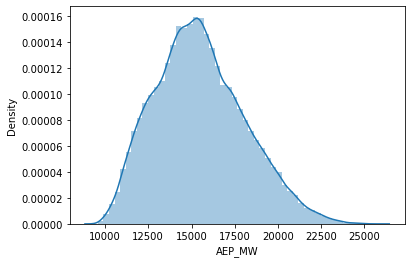

In [13]:
sns.distplot(df["AEP_MW"])

#  Energy Consumption in 15 Years

<AxesSubplot:xlabel='Year', ylabel='AEP_MW'>

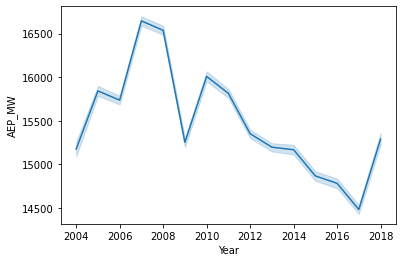

In [14]:
sns.lineplot(x=df["Year"],y=df["AEP_MW"],data=df)

#  Average in Energy Consumption in 2018 

In [15]:
df[df["Year"]==2018]["AEP_MW"].mean()

15290.612733644859

<AxesSubplot:>

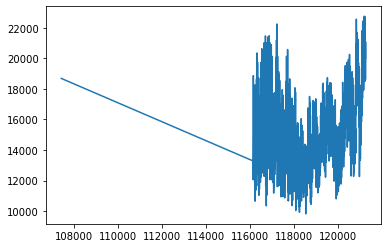

In [16]:
df[df["Year"]==2018]["AEP_MW"].plot.line()

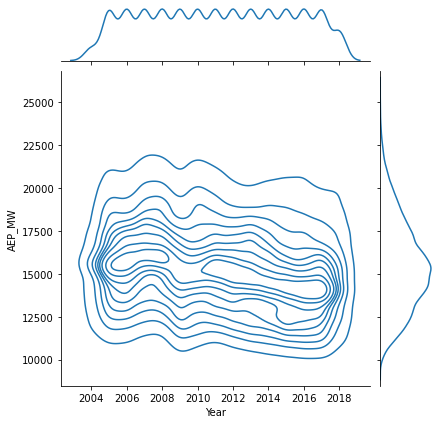

In [17]:
sns.jointplot(x=df["Year"],
            y=df["AEP_MW"],
             data=df,
            kind="kde")